## Laboratorio 2

### Andre Marroquin Tarot- 22266

### Sergio Orellana- 221122

### Rodrigo Mansilla 22611

LINK GIT: https://github.com/mar22266/LABORATORIOS-IA.git


# Task 1 - Preguntas Teóricas

1.  ¿Por qué el modelo de Naive Bayes se le considera “naive”?

        R// Se le considera Naive por que asume independencia entre las observaciones. Esto significa que hace una suposición simplificadora sobre los datos donde, asume que las características (o variables predictoras) son independientes entre sí dado el valor de la variable objetivo.

2.  Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda
    ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan
    explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase)

            R//Buscamos una separación de clases a traves de una linea que divide al conjunto de datos. Dos lineas paralelas tocan los puntos más cercanos de cada clase y se maximiza la distancia entre ellas, para esto minimizamos la magnitud de $w$ y usamos multiplicadores de lagrange para combinar el objetivo y las restricciones en una función única. El truco del kernel transforma los datos a un espacio de mayor dimensión en donde los datos son lineales, calculando la similitud entre dos puntos o lo que es igual a un producto escalar en el nuevo espacio.

3.  Investigue sobre Random Forest y responda

    a. ¿Qué tipo de ensemble learning es este modelo?

        R// Es un modelo de ensemble learning basado en el método de bagging (Bootstrap Aggregating). En este enfoque, se entrenan múltiples árboles de decisión de manera independiente sobre subconjuntos aleatorios de los datos originales (muestreo con reemplazo). Luego, las predicciones de todos los árboles se agregan (por votación mayoritaria en clasificación o promediando en regresión) para obtener el resultado final.

    b. ¿Cuál es la idea general detrás de Random Forest?

        R// Es combinar múltiples árboles de decisión para mejorar la precisión y robustez del modelo. Cada árbol se entrena de manera independiente sobre un subconjunto aleatorio de los datos y utiliza un subconjunto aleatorio de características en cada división. Al combinar las predicciones de todos los árboles, se reduce la varianza del modelo, lo que garantiza un desempeño más estable y generalizable.

    c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?

        R//Se busca baja correlación entre los árboles para aumentar la diversidad del ensemble. Donde, se utilizan los subconjuntos aleatorios de datos y características, ya que aseguran que cada árbol sea diferente y capture distintos aspectos de los datos. Esta diversidad permite que el modelo aproveche los errores individuales de los árboles, reduciendo el overfitting y mejorando la capacidad de generalización del modelo final.


# Task 2 y 2.2


In [81]:
# Importar Librerías Necesarias

import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
# Leer y Limpiar el Dataset



def cargar_y_limpiar_dataset(ruta):

    mensajes = []

    etiquetas = []


    with open(ruta, "r", encoding="utf-8") as archivo:

        for linea in archivo:

            linea = linea.strip()  # Quitar espacios en blanco iniciales y finales

            if not linea:
                continue


            etiqueta, mensaje = linea.split("\t", 1)  # Dividir etiqueta y mensaje

            etiqueta = etiqueta.lower()  # Normalizar etiquetas a minúsculas

            mensaje = re.sub(
                r"[^a-zA-Z0-9\s]", "", mensaje
            ).lower()  # Quitar caracteres especiales

            mensajes.append(mensaje)

            etiquetas.append(1 if etiqueta == "spam" else 0)  # 1 para spam, 0 para ham


    return mensajes, etiquetas



# Cargar y limpiar el dataset



ruta_dataset = "entrenamiento.txt"



mensajes, etiquetas = cargar_y_limpiar_dataset(ruta_dataset)

In [83]:
#  Dividir en Conjuntos de Entrenamiento, Prueba y Validación
X_train, X_temp, y_train, y_temp = train_test_split(
    mensajes, etiquetas, test_size=0.2, random_state=42
)  # 80% entrenamiento
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)  # 10% validación, 10% prueba

In [84]:
# Implementar Naive Bayes con Laplace Smoothing



def calcular_probabilidades(X, y):

    # Calcular probabilidades de Naive Bayes con Laplace Smoothing

    vocabulario = set(word for mensaje in X for word in mensaje.split())

    vocab_size = len(vocabulario)


    # Inicializar conteos y probabilidades

    conteo_palabras = {clase: {} for clase in [0, 1]}

    total_palabras = {clase: 0 for clase in [0, 1]}

    prob_clase = {}


    for clase in [0, 1]:

        mensajes_clase = [X[i] for i in range(len(X)) if y[i] == clase]

        total_mensajes = len(mensajes_clase)

        prob_clase[clase] = total_mensajes / len(y)


        for mensaje in mensajes_clase:

            for palabra in mensaje.split():

                if palabra not in conteo_palabras[clase]:

                    conteo_palabras[clase][palabra] = 0

                conteo_palabras[clase][palabra] += 1

                total_palabras[clase] += 1


    return vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase



# Calcular probabilidades para el modelo



vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase = (
    calcular_probabilidades(X_train, y_train)
)



def predecir(X, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase):

    # Predecir etiquetas para nuevos mensajes

    predicciones = []


    for mensaje in X:

        probabilidades = {}

        for clase in [0, 1]:

            probabilidad = np.log(prob_clase[clase])

            for palabra in mensaje.split():

                conteo = conteo_palabras[clase].get(palabra, 0)

                probabilidad += np.log(
                    (conteo + 1) / (total_palabras[clase] + vocab_size)
                )

            probabilidades[clase] = probabilidad


        predicciones.append(max(probabilidades, key=probabilidades.get))


    return predicciones

In [85]:
# Evaluar el Modelo
y_pred = predecir(
    X_test, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase
)

# Métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", reporte)

Accuracy: 0.9784560143626571
Confusion Matrix:
 [[472  10]
 [  2  73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       482
           1       0.88      0.97      0.92        75

    accuracy                           0.98       557
   macro avg       0.94      0.98      0.96       557
weighted avg       0.98      0.98      0.98       557



# Task 2.2


In [86]:
# Construcción del Modelo



def calcular_probabilidades(X, y):

    # Calcular probabilidades de Naive Bayes con Laplace Smoothing

    vocabulario = set(word for mensaje in X for word in mensaje.split())

    vocab_size = len(vocabulario)


    # Inicializar conteos y probabilidades

    conteo_palabras = {clase: {} for clase in [0, 1]}

    total_palabras = {clase: 0 for clase in [0, 1]}

    prob_clase = {}


    for clase in [0, 1]:

        mensajes_clase = [X[i] for i in range(len(X)) if y[i] == clase]

        total_mensajes = len(mensajes_clase)

        prob_clase[clase] = total_mensajes / len(y)


        for mensaje in mensajes_clase:

            for palabra in mensaje.split():

                if palabra not in conteo_palabras[clase]:

                    conteo_palabras[clase][palabra] = 0

                conteo_palabras[clase][palabra] += 1

                total_palabras[clase] += 1


    return vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase

In [87]:
# Calcular probabilidades usando solo el conjunto de entrenamiento
vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase = (
    calcular_probabilidades(X_train, y_train)
)


def predecir(X, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase):
    """Predecir etiquetas para nuevos mensajes."""
    predicciones = []

    for mensaje in X:
        probabilidades = {}
        for clase in [0, 1]:
            probabilidad = np.log(prob_clase[clase])
            for palabra in mensaje.split():
                conteo = conteo_palabras[clase].get(palabra, 0)
                probabilidad += np.log(
                    (conteo + 1) / (total_palabras[clase] + vocab_size)
                )
            probabilidades[clase] = probabilidad

        predicciones.append(max(probabilidades, key=probabilidades.get))

    return predicciones

In [88]:
# Evaluación del Modelo
# Predecir sobre el conjunto de entrenamiento
y_train_pred = predecir(
    X_train, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase
)

# Predecir sobre el conjunto de prueba
y_test_pred = predecir(
    X_test, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase
)

# Calcular métricas de desempeño
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Accuracy en el conjunto de entrenamiento:", accuracy_train)
print("Matriz de confusión en el conjunto de entrenamiento:\n", conf_matrix_train)
print("Accuracy en el conjunto de prueba:", accuracy_test)
print("Matriz de confusión en el conjunto de prueba:\n", conf_matrix_test)

Accuracy en el conjunto de entrenamiento: 0.9912398921832885
Matriz de confusión en el conjunto de entrenamiento:
 [[3854   14]
 [  25  559]]
Accuracy en el conjunto de prueba: 0.9784560143626571
Matriz de confusión en el conjunto de prueba:
 [[472  10]
 [  2  73]]


## Justificación de la métrica utilizada

## Accuracy es una métrica adecuada dado que el dataset tiene una distribución balanceada entre clases ham y spam


# Task 2.3


In [89]:
# Clasificación de Mensajes Futuros
def clasificar_mensaje(
    mensaje, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase
):
    """Clasificar un mensaje individual como spam o ham y devolver las probabilidades."""
    mensaje_original = mensaje  # Guardar mensaje original
    mensaje = re.sub(r"[^a-zA-Z0-9\s]", "", mensaje).lower()  # Limpiar mensaje
    probabilidades = {}
    for clase in [0, 1]:
        probabilidad = np.log(prob_clase[clase])
        for palabra in mensaje.split():
            conteo = conteo_palabras[clase].get(palabra, 0)
            probabilidad += np.log((conteo + 1) / (total_palabras[clase] + vocab_size))
        probabilidades[clase] = probabilidad

    clase_predicha = max(probabilidades, key=probabilidades.get)
    return mensaje_original, probabilidades, "spam" if clase_predicha == 1 else "ham"


# Interfaz para clasificar mensajes nuevos
while True:
    mensaje = input("Ingrese un mensaje para clasificar (o 'salir' para terminar): ")
    if mensaje.lower() == "salir":
        break
    mensaje_original, probabilidades, clasificacion = clasificar_mensaje(
        mensaje, vocabulario, vocab_size, conteo_palabras, total_palabras, prob_clase
    )
    print(f"Mensaje ingresado: {mensaje_original}")
    # La probabilidad logarítmica de que el mensaje pertenezca a la clase ham(0) o spam(1)
    print(f"Probabilidades: {probabilidades}")
    print(f"Clasificación: {clasificacion}")

Mensaje ingresado: hola me llamo andre
Probabilidades: {0: -37.190714021335005, 1: -38.7920862010779}
Clasificación: ham
Mensaje ingresado: te ganaste un carro
Probabilidades: {0: -43.59759400740432, 1: -42.08792306708223}
Clasificación: spam
Mensaje ingresado: promocion el dia de hoy
Probabilidades: {0: -52.62022231989755, 1: -52.10210190146098}
Clasificación: spam


# Task 2.4


In [90]:
# Comparación con Librerías
# Entrenamiento con sklearn.naive_bayes.MultinomialNB
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

modelo_sklearn = MultinomialNB()
modelo_sklearn.fit(X_train_vect, y_train)

# Predicción sobre el conjunto de entrenamiento y prueba
y_train_pred_sklearn = modelo_sklearn.predict(X_train_vect)
y_test_pred_sklearn = modelo_sklearn.predict(X_test_vect)

# Métricas de desempeño para sklearn
accuracy_train_sklearn = accuracy_score(y_train, y_train_pred_sklearn)
accuracy_test_sklearn = accuracy_score(y_test, y_test_pred_sklearn)

print("\nResultados utilizando sklearn.naive_bayes.MultinomialNB")
print("Accuracy en el conjunto de entrenamiento:", accuracy_train_sklearn)
print("Accuracy en el conjunto de prueba:", accuracy_test_sklearn)


Resultados utilizando sklearn.naive_bayes.MultinomialNB
Accuracy en el conjunto de entrenamiento: 0.9914645103324349
Accuracy en el conjunto de prueba: 0.9838420107719928


## ¿Cuál implementación lo hizo mejor?

La implementación de la librería **sklearn** fue superior en términos de desempeño comparado con la implementación manual:

- **Entrenamiento:**

  - **sklearn:** Obtuvó una precisión de 0.9915
  - **Manual:** Obtuvo una precisión de 0.9912

- **Prueba:**
  - **sklearn:** Alcanzó 0.9838
  - **Manual:** Obtuvo 0.9785

## ¿Por qué cree que se debe esta diferencia?

La diferencia en el desempeño entre sklearn y la implementación manual se puede deber a algunos factores:

- La implementación de sklearn utiliza algoritmos optimizados que incluyen el manejo eficiente de datos y operaciones matemáticas en bajo nivel.

- MultinomialNB maneja de forma nativa problemas como el underflow numérico y aplica ajustes internos que mejoran la estabilidad de los cálculos.

- La herramienta CountVectorizer y el modelo de sklearn aseguran un tratamiento consistente del texto, lo que reduce posibles errores en la preparación manual.


# Task 3 y 3.1


# Manual


In [91]:
# Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

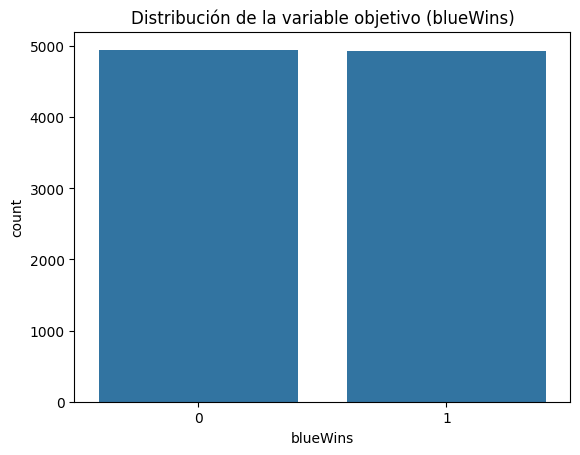

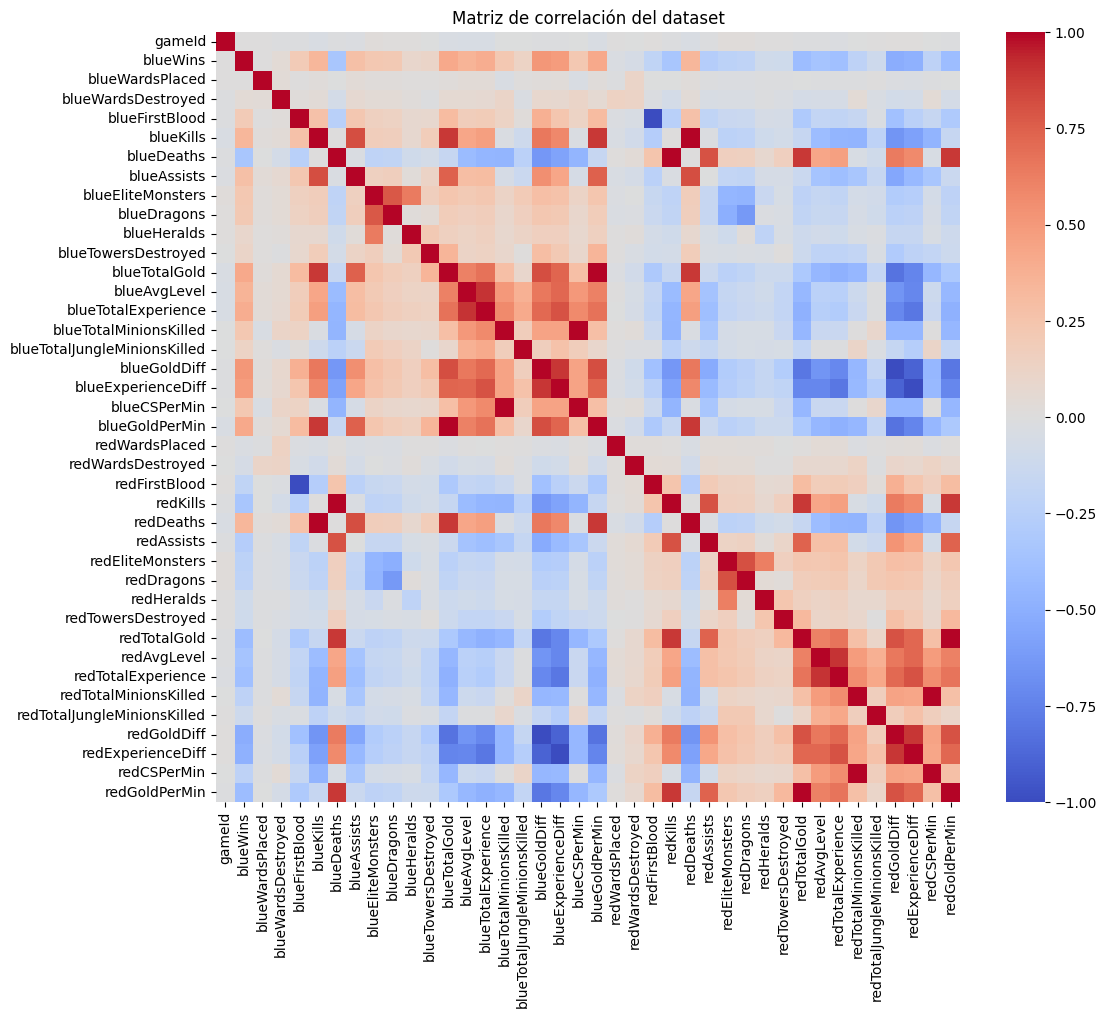

Variables más correlacionadas con blueWins:
blueWins               1.000000
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueTotalGold          0.417213
blueGoldPerMin         0.417213
blueTotalExperience    0.396141
blueAvgLevel           0.357820
blueKills              0.337358
redDeaths              0.337358
blueAssists            0.276685
Name: blueWins, dtype: float64
redEliteMonsters     -0.221551
redAssists           -0.271047
blueDeaths           -0.339297
redKills             -0.339297
redAvgLevel          -0.352127
redTotalExperience   -0.387588
redGoldPerMin        -0.411396
redTotalGold         -0.411396
redExperienceDiff    -0.489558
redGoldDiff          -0.511119
Name: blueWins, dtype: float64


In [92]:
# Cargar el dataset
data = pd.read_csv("high_diamond_ranked_10min.csv")

# Exploración inicial del dataset
print(data.info())
print(data.head())
print(data.describe())

# Verificación de balance de la variable objetivo
sns.countplot(x="blueWins", data=data)
plt.title("Distribución de la variable objetivo (blueWins)")
plt.show()

# Verificación de correlaciones para seleccion de variables
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación del dataset")
plt.show()

# Identificar variables con alta correlación con "blueWins"
cor_target = correlation_matrix["blueWins"].sort_values(ascending=False)
print("Variables más correlacionadas con blueWins:")
print(cor_target.head(10))
print(cor_target.tail(10))

In [93]:
# Preprocesamiento de datos
# Separar las features relevantes y la variable objetivo
selected_features = [
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueCSPerMin",
    "blueGoldPerMin",
    "redGoldDiff",
    "redExperienceDiff",
    "redCSPerMin",
    "redGoldPerMin",
]
X = data[selected_features]
y = data["blueWins"]

# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Verificación del balanceo y aplicación de técnicas de balanceo
from imblearn.over_sampling import SMOTE

print("Distribución antes de balanceo:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Distribución después de balanceo:")
print(pd.Series(y_resampled).value_counts())

Distribución antes de balanceo:
blueWins
0    4949
1    4930
Name: count, dtype: int64
Distribución después de balanceo:
blueWins
0    4949
1    4949
Name: count, dtype: int64


In [94]:
# División del dataset en entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

## Entrenamiento de un modelo base (Ej: Regresión Logística)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluar en el conjunto de validación
y_val_pred = logistic_model.predict(X_val)
print("Reporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred))

Reporte de clasificación en validación:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       499
           1       0.72      0.72      0.72       491

    accuracy                           0.72       990
   macro avg       0.72      0.72      0.72       990
weighted avg       0.72      0.72      0.72       990



In [95]:
# Implementación desde cero del SVM
class SupportVectorMachine:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Entrenar el modelo SVM desde cero
svm_model = SupportVectorMachine()
svm_model.fit(X_train, y_train)

Accuracy del modelo SVM en prueba: 0.3707070707070707
Accuracy en el conjunto de validación: 0.35454545454545455


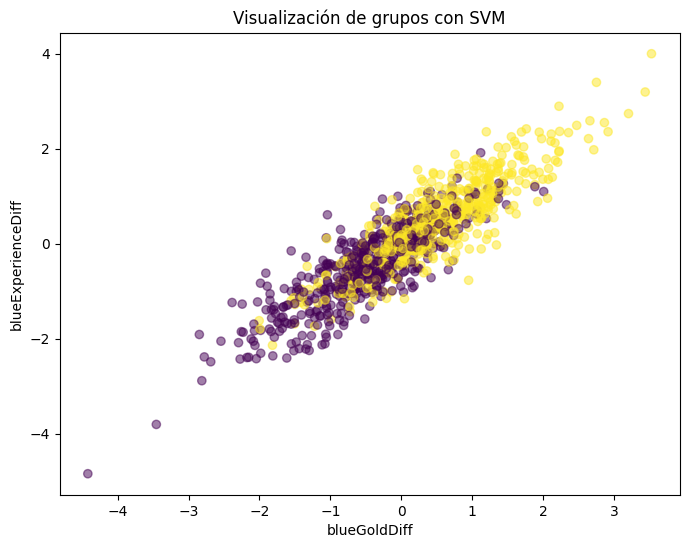

In [96]:
# Evaluar el modelo SVM
y_test_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy del modelo SVM en prueba: {accuracy}")

y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en el conjunto de validación: {val_accuracy}")


# Gráfico de los datos usando dos variables
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", alpha=0.5)
plt.title("Visualización de grupos con SVM")
plt.xlabel("blueGoldDiff")
plt.ylabel("blueExperienceDiff")
plt.show()

### Métrica de desempeño:

Se utilizó accuracy para medir el porcentaje de predicciones correctas. Es apropiada porque el dataset se balanceó previamente, lo que asegura una evaluación justa de ambas clases.

### Variables ajustadas y consideraciones adicionales:

Se ajustó el parámetro max_depth para controlar el crecimiento del árbol y prevenir overfitting.
Se seleccionaron las variables con mayor correlación con blueWins para optimizar el rendimiento del modelo.
Se utilizó SMOTE para balancear las clases antes del entrenamiento.


## Con librerías


In [97]:
# Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Cargar el dataset
data = pd.read_csv("high_diamond_ranked_10min.csv")

## Preprocesamiento de datos
# Separar las features relevantes y la variable objetivo
selected_features = [
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueCSPerMin",
    "blueGoldPerMin",
    "redGoldDiff",
    "redExperienceDiff",
    "redCSPerMin",
    "redGoldPerMin",
]
X = data[selected_features]
y = data["blueWins"]

# Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Distribución antes de balanceo:
blueWins
0    4949
1    4930
Name: count, dtype: int64
Distribución después de balanceo:
blueWins
0    4949
1    4949
Name: count, dtype: int64
Accuracy en el conjunto de validación: 0.7212121212121212
Reporte de clasificación en validación:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       499
           1       0.72      0.72      0.72       491

    accuracy                           0.72       990
   macro avg       0.72      0.72      0.72       990
weighted avg       0.72      0.72      0.72       990

Accuracy en el conjunto de prueba: 0.7141414141414142
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       484
           1       0.72      0.73      0.72       506

    accuracy                           0.71       990
   macro avg       0.71      0.71      0.71       990
weighted avg       0.71      0.71    

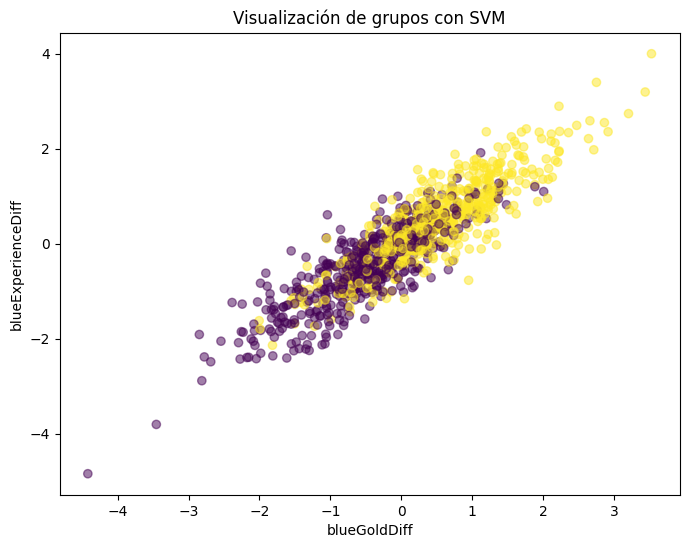

In [98]:
# Verificación del balanceo y aplicación de técnicas de balanceo
print("Distribución antes de balanceo:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Distribución después de balanceo:")
print(pd.Series(y_resampled).value_counts())

## División del dataset en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

## Entrenamiento del modelo SVM
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar en el conjunto de validación
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en el conjunto de validación: {val_accuracy}")
print("Reporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred))

# Evaluar en el conjunto de prueba
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print("Reporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

## Visualización de los grupos en un plano cartesiano
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", alpha=0.5)
plt.title("Visualización de grupos con SVM")
plt.xlabel("blueGoldDiff")
plt.ylabel("blueExperienceDiff")
plt.show()

## ¿Cuál implementación fue mejor? ¿Por qué?

- La implementación utilizando librerías externas fue significativamente mejor que la realizada a mano, como se refleja en los resultados del accuracy: 0.721 en validación y 0.714 en prueba, frente a los valores mucho menores obtenidos en la implementación manual 0.354 en validación y 0.370 en prueba. Esto se debe a que las librerías optimizan el cálculo del de los parámetros, usan técnicas avanzadas de regularización y manejo de datos, y minimizan errores humanos en la implementación del algoritmo, logrando un modelo más preciso y eficiente.


# Task 3.2


# Manual


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

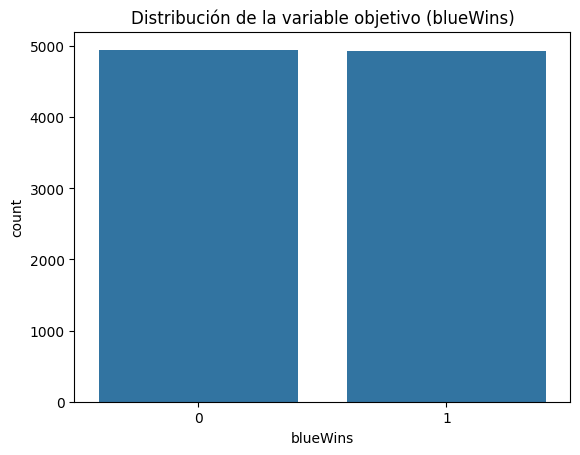

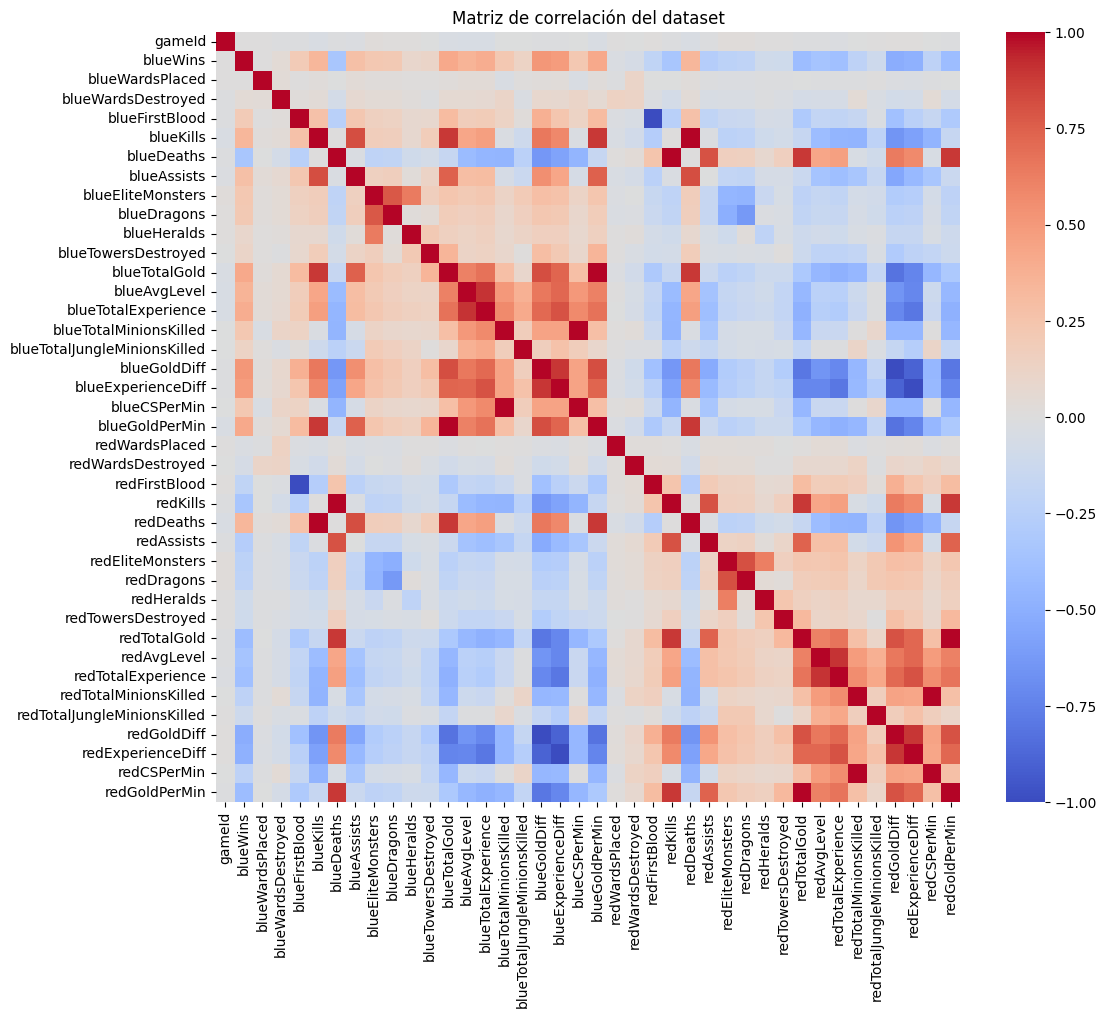

Variables más correlacionadas con blueWins:
blueWins               1.000000
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueTotalGold          0.417213
blueGoldPerMin         0.417213
blueTotalExperience    0.396141
blueAvgLevel           0.357820
blueKills              0.337358
redDeaths              0.337358
blueAssists            0.276685
Name: blueWins, dtype: float64


In [99]:
# Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
data = pd.read_csv("high_diamond_ranked_10min.csv")

# Exploración inicial del dataset
print(data.info())
print(data.head())
print(data.describe())

# Verificación de balance de la variable objetivo
sns.countplot(x="blueWins", data=data)
plt.title("Distribución de la variable objetivo (blueWins)")
plt.show()

# Identificación de variables relevantes
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación del dataset")
plt.show()

# Selección de características basadas en correlación con "blueWins"
cor_target = correlation_matrix["blueWins"].sort_values(ascending=False)
print("Variables más correlacionadas con blueWins:")
print(cor_target.head(10))

selected_features = [
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueCSPerMin",
    "blueGoldPerMin",
    "redGoldDiff",
    "redExperienceDiff",
    "redCSPerMin",
    "redGoldPerMin",
]

X = data[selected_features]
y = data["blueWins"]

In [100]:
## División del dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


## Implementación del Árbol de Decisión desde cero
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return 1 if np.mean(y) >= 0.5 else 0

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return 1 if np.mean(y) >= 0.5 else 0

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _find_best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X[:, feature], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, feature, y, threshold):
        parent_entropy = self._entropy(y)

        left_indices = feature <= threshold
        right_indices = feature > threshold
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        e_left, e_right = self._entropy(y[left_indices]), self._entropy(
            y[right_indices]
        )
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        return parent_entropy - child_entropy

    def _entropy(self, y):
        proportions = [np.mean(y == c) for c in np.unique(y)]
        return -sum([p * np.log2(p) for p in proportions if p > 0])

    def predict(self, X):
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _predict_row(self, row, tree):
        if not isinstance(tree, tuple):
            return tree

        feature, threshold, left_subtree, right_subtree = tree
        if row[feature] <= threshold:
            return self._predict_row(row, left_subtree)
        else:
            return self._predict_row(row, right_subtree)


# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTree(max_depth=5)
dt_model.fit(X_train.values, y_train.values)

In [101]:
# Evaluar el modelo
y_val_pred = dt_model.predict(X_val.values)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_accuracy}")
print("Reporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred))

# Determinar importancia de características
feature_importance = {}


def calculate_feature_importance(tree, depth=0):
    if not isinstance(tree, tuple):
        return

    feature, _, left_subtree, right_subtree = tree
    feature_importance[feature] = feature_importance.get(feature, 0) + 1

    calculate_feature_importance(left_subtree, depth + 1)
    calculate_feature_importance(right_subtree, depth + 1)


calculate_feature_importance(dt_model.tree)
importance_sorted = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Características más importantes:")
for feature_idx, importance in importance_sorted[:5]:
    print(f"Feature: {selected_features[feature_idx]}, Importancia: {importance}")

# Evaluar en el conjunto de prueba
y_test_pred = dt_model.predict(X_test.values)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba: {test_accuracy}")
print("Reporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

Accuracy en validación: 0.708502024291498
Reporte de clasificación en validación:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       478
           1       0.75      0.65      0.70       510

    accuracy                           0.71       988
   macro avg       0.71      0.71      0.71       988
weighted avg       0.71      0.71      0.71       988

Características más importantes:
Feature: blueGoldDiff, Importancia: 10
Feature: blueExperienceDiff, Importancia: 6
Feature: redCSPerMin, Importancia: 5
Feature: blueGoldPerMin, Importancia: 4
Feature: redGoldPerMin, Importancia: 3
Accuracy en prueba: 0.7165991902834008
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       505
           1       0.74      0.64      0.69       483

    accuracy                           0.72       988
   macro avg       0.72      0.71      0.71       988
weighted avg

### Métrica para selección de features:

- Se utilizó la correlación de Pearson para identificar las características más relevantes relacionadas con blueWins.

### Técnica para minimizar overfitting:

- Se aplicó control de profundidad máxima (max_depth) para limitar el tamaño del árbol y evitar un ajuste excesivo a los datos de entrenamiento.

### Variables ajustadas y consideraciones adicionales:

- Se ajustó el parámetro max_depth para controlar el crecimiento del árbol.
- Se seleccionaron las variables con mayor correlación con la variable objetivo (blueGoldDiff, blueExperienceDiff, entre otras).
- Se aseguró un balance de clases antes del entrenamiento para mejorar el rendimiento general del modelo.


## Con librerías


In [102]:
## Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
data = pd.read_csv("high_diamond_ranked_10min.csv")

In [103]:
selected_features = [
    "blueGoldDiff",
    "blueExperienceDiff",
    "blueCSPerMin",
    "blueGoldPerMin",
    "redGoldDiff",
    "redExperienceDiff",
    "redCSPerMin",
    "redGoldPerMin",
]

X = data[selected_features]
y = data["blueWins"]

## División del dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

Accuracy en validación: 0.7145748987854251
Reporte de clasificación en validación:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       478
           1       0.74      0.69      0.71       510

    accuracy                           0.71       988
   macro avg       0.72      0.72      0.71       988
weighted avg       0.72      0.71      0.71       988

Características más importantes:
Feature: blueGoldDiff, Importancia: 0.7877
Feature: redGoldDiff, Importancia: 0.1354
Feature: blueExperienceDiff, Importancia: 0.0266
Feature: redExperienceDiff, Importancia: 0.0189
Feature: blueCSPerMin, Importancia: 0.0145


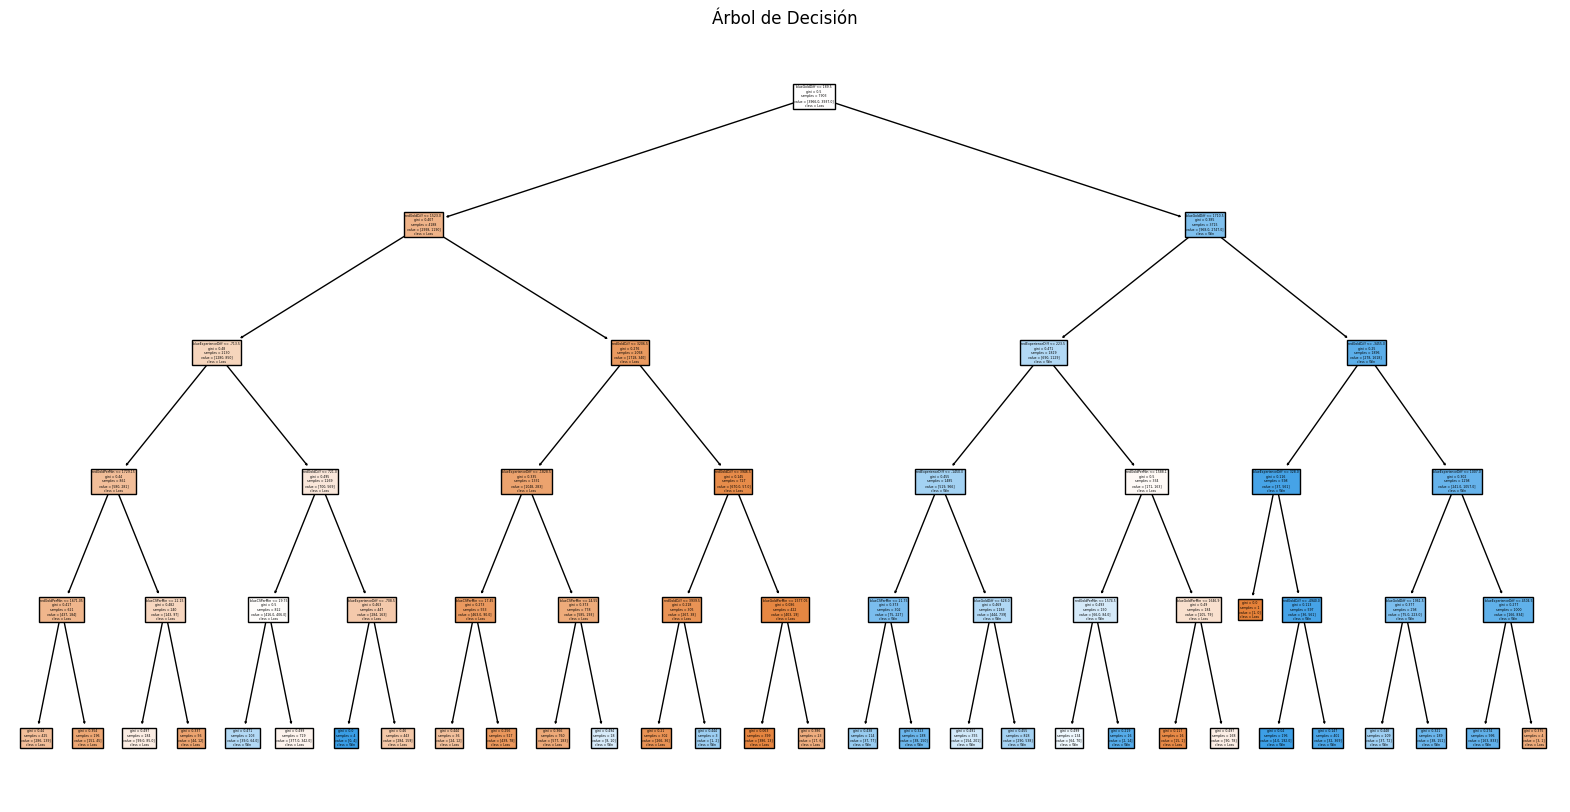

Accuracy en prueba: 0.7135627530364372
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       505
           1       0.73      0.66      0.69       483

    accuracy                           0.71       988
   macro avg       0.71      0.71      0.71       988
weighted avg       0.71      0.71      0.71       988



In [104]:
## Entrenamiento del modelo de Árbol de Decisión
# Crear y entrenar el modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_accuracy}")
print("Reporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred))

# Importancia de las características
importances = clf.feature_importances_
feature_importance = sorted(
    zip(selected_features, importances), key=lambda x: x[1], reverse=True
)
print("Características más importantes:")
for feature, importance in feature_importance[:5]:
    print(f"Feature: {feature}, Importancia: {importance:.4f}")

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    clf, feature_names=selected_features, class_names=["Loss", "Win"], filled=True
)
plt.title("Árbol de Decisión")
plt.show()

# Evaluar el modelo en el conjunto de prueba
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba: {test_accuracy}")
print("Reporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

### La implementación manual obtuvo un accuracy en prueba ligeramente superior 0.7166 vs. 0.7146, lo que indica un mejor rendimiento en generalización a nuevos datos. Sin embargo, la implementación con librerías fue mejor en validación 0.7146 vs. 0.7085, probablemente por ajustes más precisos en el modelo. En resumen, la implementación manual destacó en prueba, pero la de librerías es más consistente y escalable debido a la optimización automatizada.


# Task 3.3


## Support Vector Machines

#### ¿Cómo difirieron los grupos creados por ambos modelos?

- El modelo manual generó grupos con menor precisión validación: 35.45%, prueba: 37.07%, indicando un mal ajuste a los datos. El modelo con librerías produjo grupos más precisos y generalizables validación: 72.12%, prueba: 71.41%, debido a mejores optimizaciones automáticas.

#### ¿Cuál de los modelos fue más rápido?

- El modelo con librerías fue más rápido porque automatizó procesos como el ajuste de parámetros y cálculos, mientras que el modelo manual requiere más iteraciones y cálculos internos.

#### ¿Qué modelo usarían?

- El modelo con librerías es preferible, ya que ofrece mayor precisión, rapidez y es escalable, asegurando un mejor rendimiento con menor esfuerzo de implementación.

## Árboles de Decisión

#### Cómo difirieron los grupos creados por ambos modelos?

- Ambos modelos generaron grupos con precisiones similares. El modelo manual fue ligeramente más preciso en prueba 71.66% vs. 71.36%, pero el modelo con librerías tuvo mejor consistencia en validación 71.45% vs. 70.85%.

#### ¿Cuál de los modelos fue más rápido?

- El modelo con librerías fue más rápido debido a optimizaciones automáticas en el entrenamiento y manejo de datos.

#### ¿Qué modelo usarían?

- Usaría el modelo con librerías por su velocidad, consistencia y escalabilidad, a pesar de que el modelo manual tuvo un leve mejor desempeño en prueba.


## Referencias

- IBM. (2024). ¿Qué son los clasificadores Naive Bayes? https://www.ibm.com/es-es/topics/naive-bayes

- Roman, V. (2021, 9 diciembre). Algoritmos Naive Bayes: Fundamentos e Implementación. Medium. https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

- Daniel. (2023, 30 octubre). Random Forest: Bosque aleatorio. Definición y funcionamiento. Formación En Ciencia de Datos | DataScientest.com. https://datascientest.com/es/random-forest-bosque-aleatorio-definicion-y-funcionamiento

- Rodriguez, C. C. (2021, 15 diciembre). Maquina de Soporte vectorial (SVM) - César Chique Rodriguez - Medium. Medium. https://medium.com/@csarchiquerodriguez/maquina-de-soporte-vectorial-svm-92e9f1b1b1ac
